In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ajout de l'import pour plt
import seaborn as sns
from datetime import datetime

# **1. Data Understanding**


 Loading, inspecting, and identifying missing or duplicate data.

## Step 1: Load the dataset
 We start by loading the dataset containing club statistics.

In [ ]:
# Charger votre dataset (remplacez par le chemin de votre fichier)
df = pd.read_csv('C:\\Users\\MSI\\OneDrive - ESPRIT\\Bureau\\all_coaches.csv')

### Dataset First View

In [58]:
# Dataset First Look
print(df.head())


                   name          club  birth_date   age place_of_birth  \
0         Pep Guardiola      Man City  1971-01-18  50.0      Santpedor   
1  Ole Gunnar Solskjaer  Without Club  1973-02-26  48.0   Kristiansund   
2         Thomas Tuchel       Chelsea  1973-08-29  48.0       Krumbach   
3          Jürgen Klopp     Liverpool  1967-06-16  54.0      Stuttgart   
4   Nuno Espírito Santo  Without Club  1974-01-25  47.0       São Tomé   

  citizenship appointment_date contract_until_date   coaching_licence  \
0       Spain       2016-07-01          2023-06-30                SEG   
1      Norway              NaN                 NaN      Jim Solbakken   
2     Germany       2021-01-26          2024-06-30  Dr. Olaf Meinking   
3     Germany       2015-10-08          2024-06-30   UEFA Pro Licence   
4    Portugal              NaN                 NaN          Gestifute   

  avg_term_as_coach preffered_formation  current_league current_league_country  
0        3.38 Years     4-3-3 Attac

### Dataset Rows & Columns count

In [59]:
# Dataset Rows & Columns count
print(df.shape)

(99, 13)


### Dataset Information

In [60]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    99 non-null     object 
 1   club                    96 non-null     object 
 2   birth_date              96 non-null     object 
 3   age                     96 non-null     float64
 4   place_of_birth          96 non-null     object 
 5   citizenship             96 non-null     object 
 6   appointment_date        83 non-null     object 
 7   contract_until_date     82 non-null     object 
 8   coaching_licence        96 non-null     object 
 9   avg_term_as_coach       96 non-null     object 
 10  preffered_formation     95 non-null     object 
 11  current_league          96 non-null     object 
 12  current_league_country  96 non-null     object 
dtypes: float64(1), object(12)
memory usage: 10.2+ KB


### Variables Description

In [78]:
# Dataset Duplicate Value Count
df.duplicated().sum()

1

#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count

df.isnull().sum()

name                       0
club                       3
birth_date                 3
age                        3
place_of_birth             3
citizenship                3
appointment_date          16
contract_until_date       17
coaching_licence           3
avg_term_as_coach          3
preffered_formation        4
current_league             3
current_league_country     3
dtype: int64

### ***2.2 Understanding Our Variables***

In [70]:
# Dataset Columns
df.columns

Index(['name', 'club', 'birth_date', 'age', 'place_of_birth', 'citizenship',
       'appointment_date', 'contract_until_date', 'coaching_licence',
       'avg_term_as_coach', 'preffered_formation', 'current_league',
       'current_league_country'],
      dtype='object')

In [75]:
# Dataset Describe
df.describe()

,age
count,96.000000
mean,51.364583
std,7.384364
min,34.000000
25%,46.000000
50%,50.000000
75%,57.000000
max,70.000000


### Variables Description

.name : Nom de l'entraîneur

.club : Club actuel de l'entraîneur (ou "Without Club" s'il n'a pas de club)

.birth_date : Date de naissance de l'entraîneur

.age : Âge de l'entraîneur

.place_of_birth : Ville ou région de naissance de l'entraîneur

.citizenship : Nationalité de l'entraîneur

.appointment_date : Date de nomination à son poste actuel

.contract_until_date : Date d'expiration du contrat actuel

.coaching_licence : Licence d'entraîneur détenue (ex : UEFA Pro Licence)

.avg_term_as_coach : Durée moyenne passée en tant qu'entraîneur (en années)

.preffered_formation : Formation tactique préférée (ex : 4-2-3-1)

.current_league : Ligue dans laquelle l'entraîneur travaille actuellement (ex : Serie A)

.current_league_country : Pays de la ligue actuelle


### Check Unique Values for each variable.

In [79]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in ",i,"is", df[i].nunique())

No. of unique values in  name is 98
No. of unique values in  club is 83
No. of unique values in  birth_date is 95
No. of unique values in  age is 27
No. of unique values in  place_of_birth is 87
No. of unique values in  citizenship is 19
No. of unique values in  appointment_date is 60
No. of unique values in  contract_until_date is 5
No. of unique values in  coaching_licence is 44
No. of unique values in  avg_term_as_coach is 78
No. of unique values in  preffered_formation is 15
No. of unique values in  current_league is 5
No. of unique values in  current_league_country is 5


### 2.3 Data Wrangling Code


In [81]:

#  Nombre total d'entraîneurs sans club
print("No. of coaches without a club :", df[df['club'] == 'Without Club'].club.count())

# Extraction des entraîneurs sans club
without_club_df = df[df['club'] == 'Without Club']

# Nombre total de nationalités uniques
print("No. of unique nationalities :", df['citizenship'].nunique())

# Nombre d'entraîneurs avec une licence UEFA Pro
print("No. of coaches with UEFA Pro Licence :", df[df['coaching_licence'] == 'UEFA Pro Licence']['coaching_licence'].count())

# Nombre d'entraîneurs préférant la formation 4-2-3-1
print("No. of coaches preferring 4-2-3-1 formation :", df[df['preffered_formation'] == '4-2-3-1']['preffered_formation'].count())

#  Extraction des entraîneurs de Serie A
serie_a_coaches = df[df['current_league'] == 'Serie A']
print("No. of coaches in Serie A :", serie_a_coaches.shape[0])

# Afficher le DataFrame des entraîneurs sans club
without_club_df


No. of coaches without a club : 13
No. of unique nationalities : 19
No. of coaches with UEFA Pro Licence : 40
No. of coaches preferring 4-2-3-1 formation : 31
No. of coaches in Serie A : 21


,name,club,birth_date,age,place_of_birth,citizenship,appointment_date,contract_until_date,coaching_licence,avg_term_as_coach,preffered_formation,current_league,current_league_country
1,Ole Gunnar Solskjaer,Without Club,1973-02-26,48.0,Kristiansund,Norway,NaN,NaN,Jim Solbakken,2.05 Years,4-2-3-1,Premier League,England
4,Nuno Espírito Santo,Without Club,1974-01-25,47.0,São Tomé,Portugal,NaN,NaN,Gestifute,1.76 Years,3-4-3,Premier League,England
16,Daniel Farke,Without Club,1976-10-30,45.0,Steinhausen,Germany,NaN,NaN,UEFA Pro Licence,4.07 Years,4-2-3-1,Premier League,England
33,Luca Gotti,Without Club,1967-09-13,54.0,Adria,Italy,NaN,NaN,UEFA Pro Licence,1.31 Years,3-5-2 flat,Serie A,Italy
34,Davide Ballardini,Without Club,1964-01-06,58.0,Ravenna,Italy,NaN,NaN,P&P Sport ...,0.96 Years,3-5-2 flat,Serie A,Italy
43,Ronald Koeman,Without Club,1963-03-21,58.0,Zaandam,Netherlands,NaN,NaN,Wasserman,1.65 Years,4-3-3 Attacking,La Liga,Spain
57,Javier Calleja,Without Club,1978-05-12,43.0,Madrid,Spain,NaN,NaN,AIS Management,1.15 Years,4-3-3 Attacking,La Liga,Spain
60,Fran Escribá,Without Club,1965-05-03,56.0,Valencia,Spain,NaN,NaN,Licence trainer,1.22 Years,4-4-2,La Liga,Spain
62,Niko Kovac,Without Club,1971-10-15,50.0,Berlin,Croatia,NaN,NaN,Alen Augustincic,1.58 Years,4-4-2 double 6,Ligue 1,France
78,Laurent Batlles,Without Club,1975-09-23,46.0,Nantes,France,NaN,NaN,UEFA Pro Licence,2.17 Years,3-5-2 flat,Ligue 1,France


In [ ]:

#  Nombre total d'entraîneurs
total_coaches = df.shape[0]
print("Total no. of coaches :", total_coaches)

# Nombre total d'entraîneurs sans club
without_club_count = df[df['club'] == 'Without Club'].shape[0]

# Calcul du pourcentage d'entraîneurs sans club
perc_without_club = (without_club_count / total_coaches) * 100
print(f"Percentage of coaches without a club : {round(perc_without_club, 2)}%")

Total no. of coaches : 99
Percentage of coaches without a club : 13.13%


In [ ]:

# Regrouper les entraîneurs sans club par nationalité et afficher les ligues uniques
country_league_churn = df[df['club'] == 'Without Club'].groupby(['citizenship'])['current_league'].unique().reset_index(name='Unique leagues')

# Affichage du DataFrame
country_league_churn

,citizenship,Unique leagues
0,Croatia,[Ligue 1]
1,France,[Ligue 1]
2,Germany,[Premier League]
3,Hungary,[Bundesliga]
4,Italy,[Serie A]
5,Netherlands,"[La Liga, Bundesliga]"
6,Norway,[Premier League]
7,Portugal,[Premier League]
8,Spain,[La Liga]


## ***2.4 Data Vizualization***


club
With Club       86
Without Club    13
Name: count, dtype: int64
 


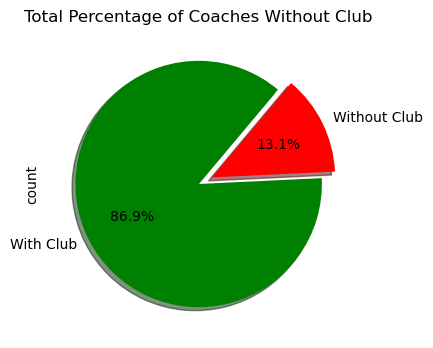

In [84]:
#  Comptage des entraîneurs avec et sans club
club_status_counts = df['club'].apply(lambda x: 'Without Club' if x == 'Without Club' else 'With Club').value_counts()
print(club_status_counts)
print(" ")

#  Visualisation en graphique circulaire
plt.figure(figsize=(4,4))
club_status_counts.plot(kind='pie', 
                        autopct="%1.1f%%", 
                        startangle=50, 
                        shadow=True, 
                        labels=['With Club', 'Without Club'], 
                        colors=['green', 'red'], 
                        explode=[0, 0.12])

plt.title('Total Percentage of Coaches Without Club')
plt.show()

# **3. Data Preparation**

**Handeling Outliers**

In [88]:
def handle_outliers_all_columns(df, method='remove', multiplier=1.5, max_iter=3):
    df_cleaned = df.copy()  # Avoid modifying the original DataFrame
    numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

    for _ in range(max_iter):  # Apply the process iteratively
        for col in numerical_cols:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            if method == 'remove':
                df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            elif method == 'replace':
                median = df_cleaned[col].median()
                df_cleaned[col] = np.where(
                    (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound),
                    median,
                    df_cleaned[col]
                )
            elif method == 'cap':
                df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)
            else:
                raise ValueError("Method must be 'remove', 'replace', or 'cap'.")

        # Check for convergence: Break if no more outliers
        if all(
            (df_cleaned[col] >= (df_cleaned[col].quantile(0.25) - multiplier * IQR)).all() and
            (df_cleaned[col] <= (df_cleaned[col].quantile(0.75) + multiplier * IQR)).all()
            for col in numerical_cols
        ):
            break

    return df_cleaned

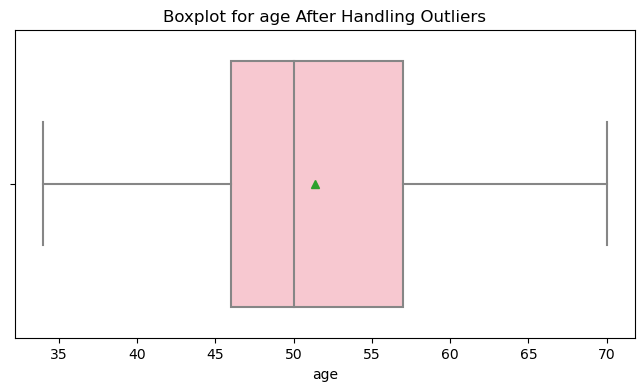

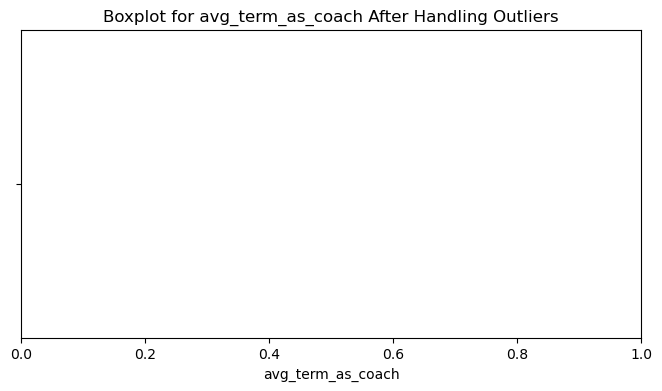

In [89]:
# Clean the DataFrame with stricter bounds
df_cleaned = handle_outliers_all_columns(df, method='replace', multiplier=1.2, max_iter=5)

# Visualize the results with boxplots
for col in df_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], orient='h', showmeans=True, color='pink')
    plt.title(f"Boxplot for {col} After Handling Outliers")
    plt.xlabel(col)
    plt.show()

In [90]:
# Suppression des doublons
df.drop_duplicates(inplace=True)